# **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# **Exploratory Data Analysis**

In [2]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
290,LP001936,Male,Yes,0,Graduate,No,3075,2416.0,139.0,360.0,1.0,Rural,Y
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
383,LP002234,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N


In [6]:
df.describe(include = 'all')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df['Loan_ID'].nunique()

614

In [12]:
df['Credit_History'].nunique()

2

In [13]:
target_cols = 'Loan_Status'
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
drop_cols = ['Loan_ID']

# **Univariate Analysis**

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

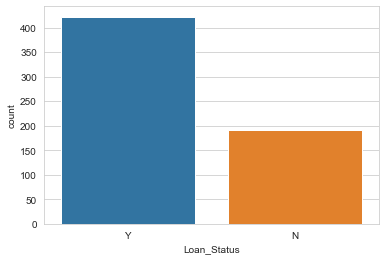

In [14]:
print(df['Loan_Status'].value_counts())
sns.countplot(data = df, x = 'Loan_Status')

Gender
Female    112
Male      489
Name: Gender, dtype: int64


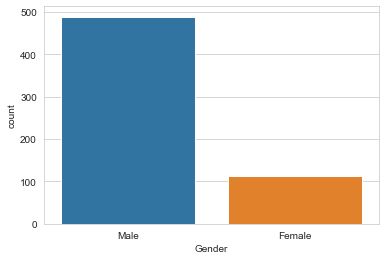

Married
No     213
Yes    398
Name: Married, dtype: int64


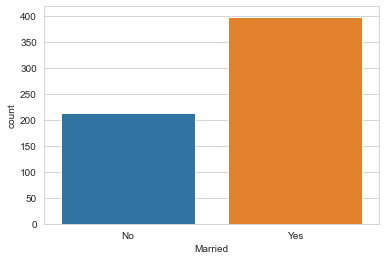

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


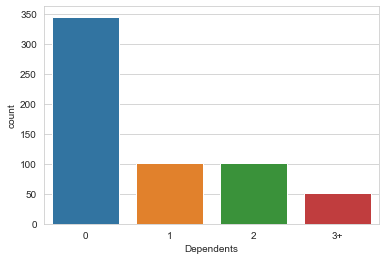

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


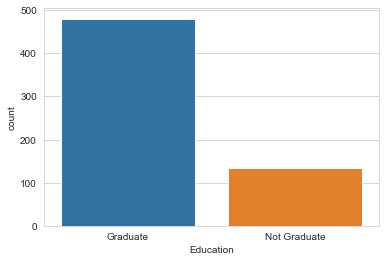

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


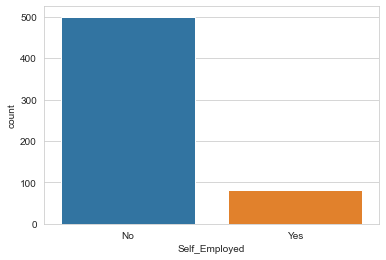

Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64


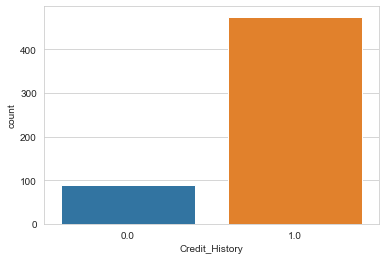

Property_Area
Rural        179
Semiurban    233
Urban        202
Name: Property_Area, dtype: int64


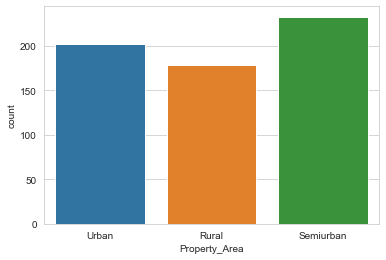

In [15]:
def cat_analyze(col) :
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data = df, x = col)
    plt.show()

for col in cat_cols :
    cat_analyze(col)


from above graphs we can say (not sure) that property_area has less significant on Loan_Status

ApplicantIncome


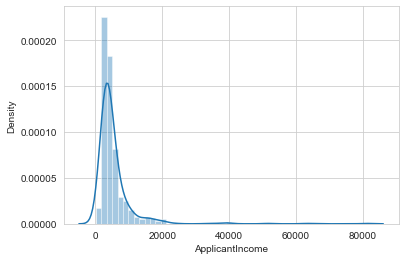

CoapplicantIncome


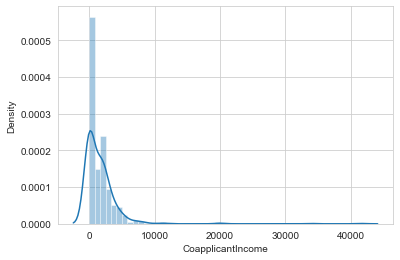

LoanAmount


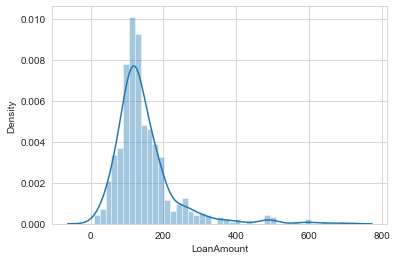

Loan_Amount_Term


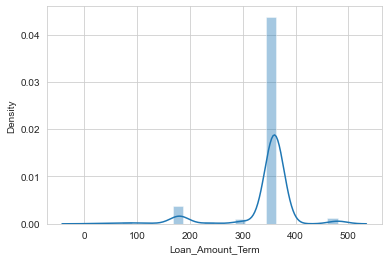

In [16]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyze(col)

# **Bivariate Analysis**

Gender
Loan_Status  Gender
N            Female     37
             Male      150
Y            Female     75
             Male      339
Name: Gender, dtype: int64


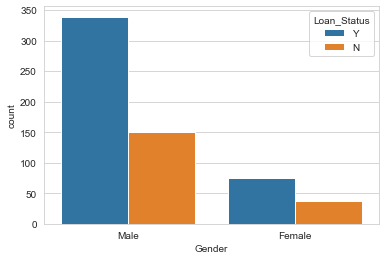

Married
Loan_Status  Married
N            No          79
             Yes        113
Y            No         134
             Yes        285
Name: Married, dtype: int64


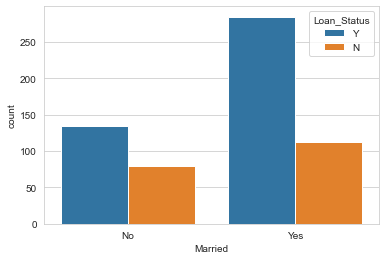

Dependents
Loan_Status  Dependents
N            0             107
             1              36
             2              25
             3+             18
Y            0             238
             1              66
             2              76
             3+             33
Name: Dependents, dtype: int64


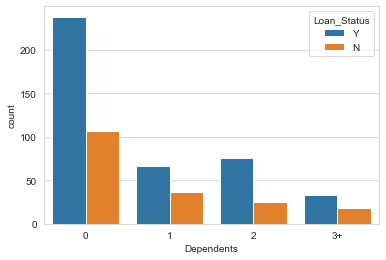

Education
Loan_Status  Education   
N            Graduate        140
             Not Graduate     52
Y            Graduate        340
             Not Graduate     82
Name: Education, dtype: int64


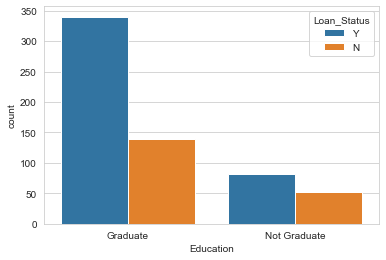

Self_Employed
Loan_Status  Self_Employed
N            No               157
             Yes               26
Y            No               343
             Yes               56
Name: Self_Employed, dtype: int64


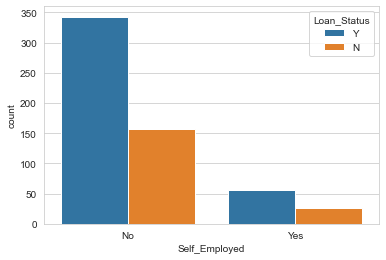

Credit_History
Loan_Status  Credit_History
N            0.0                82
             1.0                97
Y            0.0                 7
             1.0               378
Name: Credit_History, dtype: int64


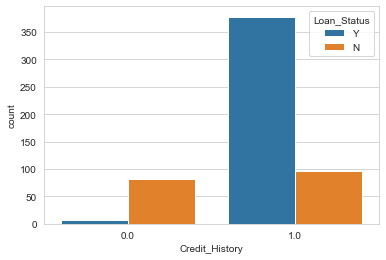

Property_Area
Loan_Status  Property_Area
N            Rural             69
             Semiurban         54
             Urban             69
Y            Rural            110
             Semiurban        179
             Urban            133
Name: Property_Area, dtype: int64


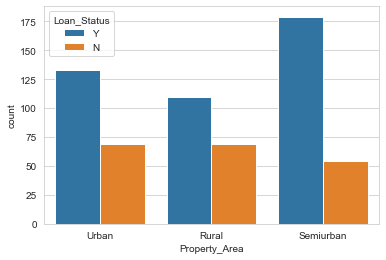

In [17]:
def cat_bivariate(col) :
    print(col)
    print(df.groupby(target_cols)[col].value_counts().sort_index())
    sns.countplot(data=df, x =col, hue=target_cols)
    plt.show()

for col in cat_cols:
    cat_bivariate(col)

ApplicantIncome


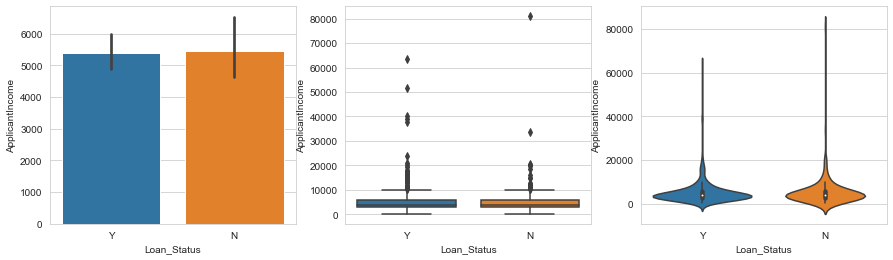

CoapplicantIncome


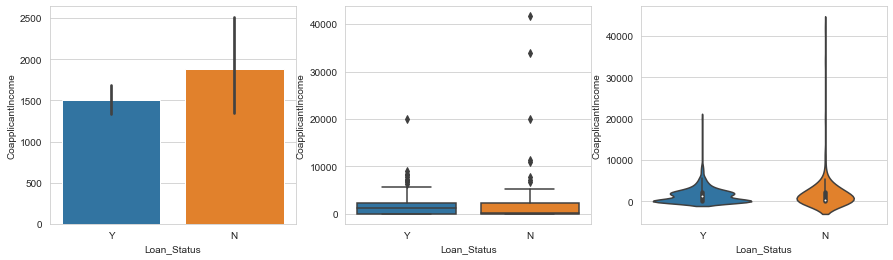

LoanAmount


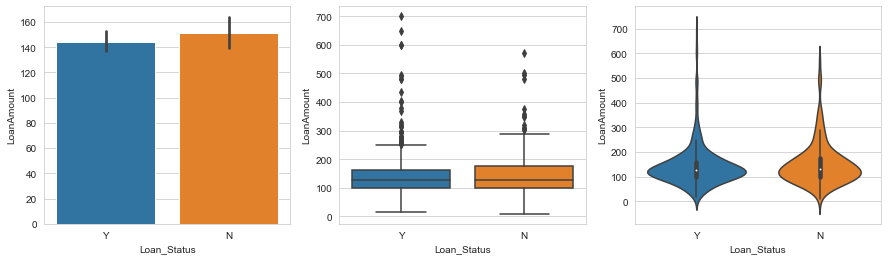

Loan_Amount_Term


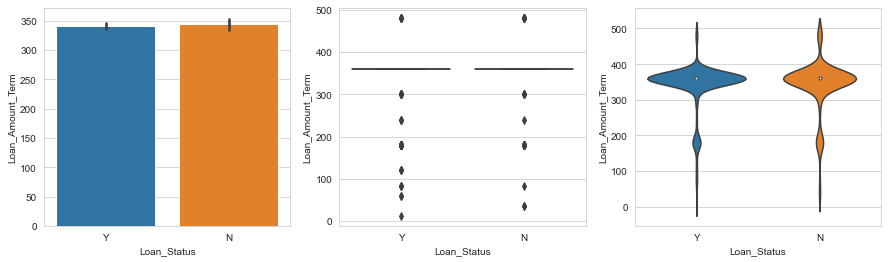

In [18]:
def num_bivariate(col) :
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df, x=target_cols, y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df, x=target_cols, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=target_cols, y=col)
    plt.show()

for col in num_cols:
    num_bivariate(col)

<AxesSubplot:>

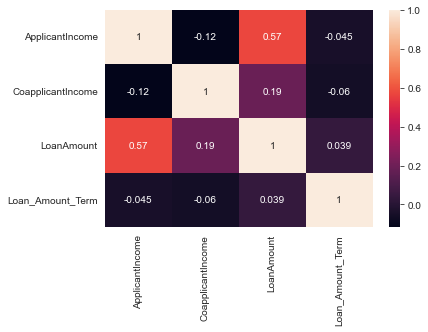

In [19]:
sns.heatmap(df[num_cols].corr(), annot=True)

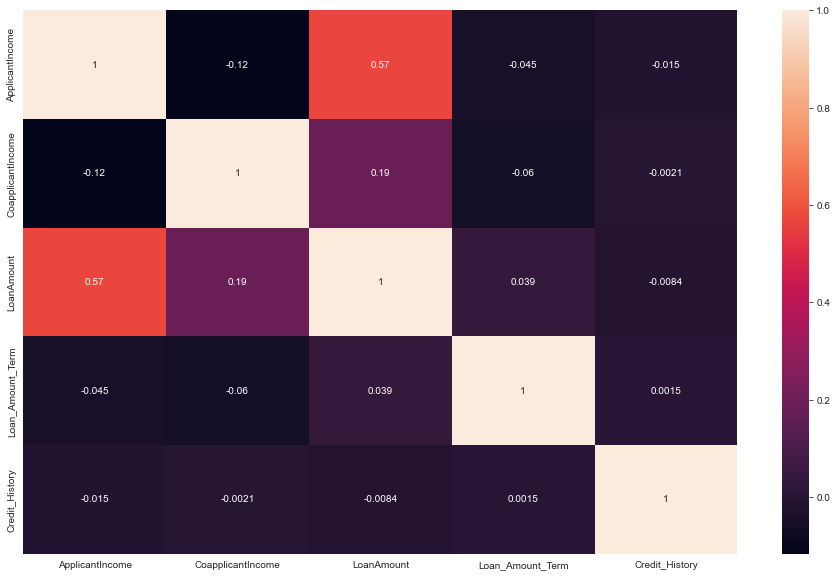

In [20]:
fig = plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()
fig.savefig('mygraph.png')


# **Multivariate Analysis**

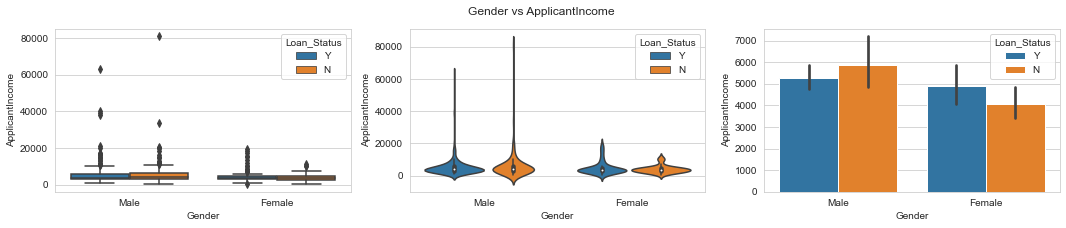

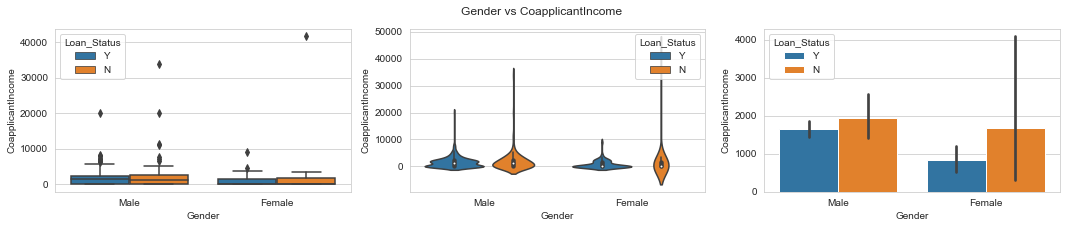

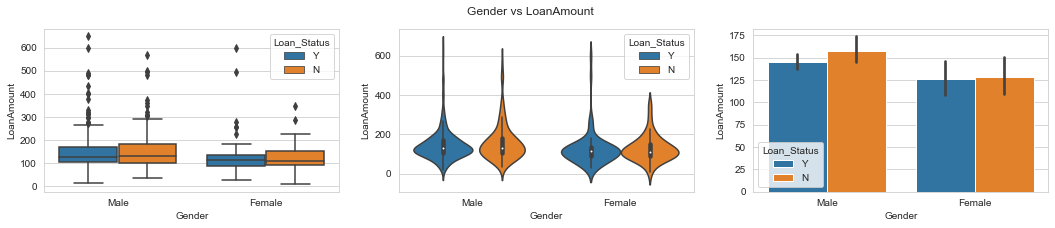

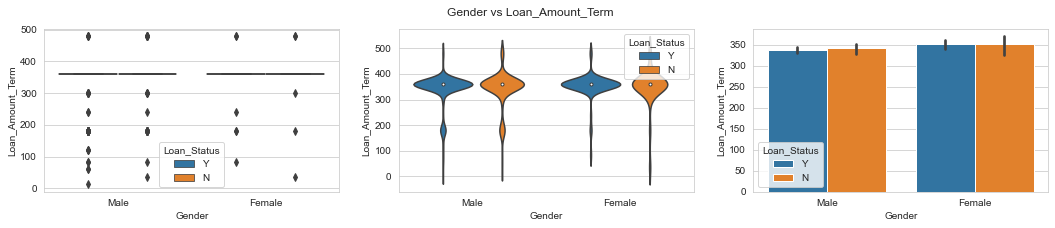

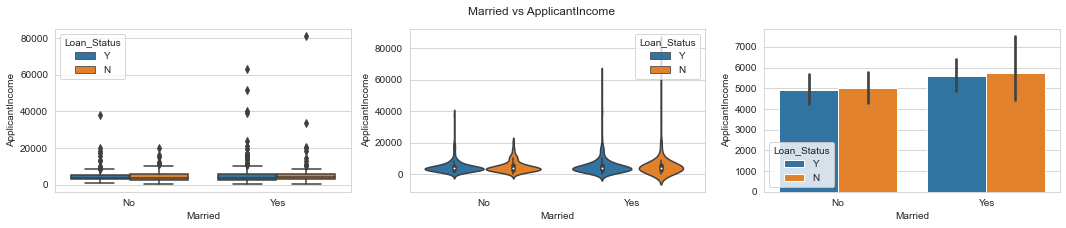

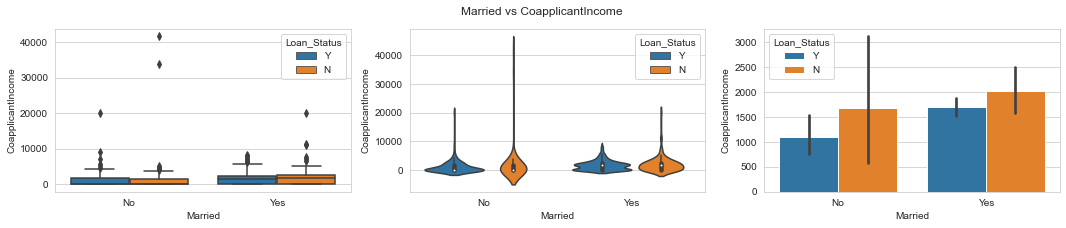

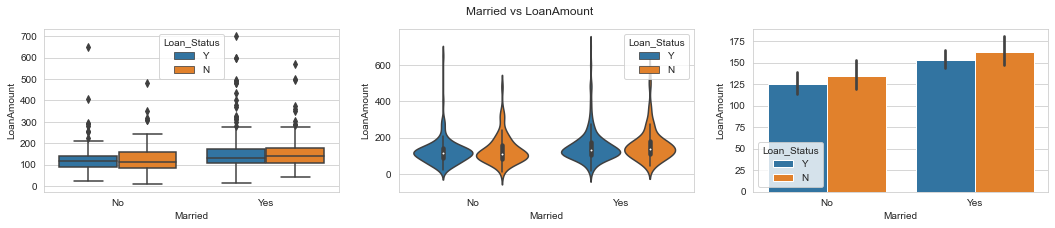

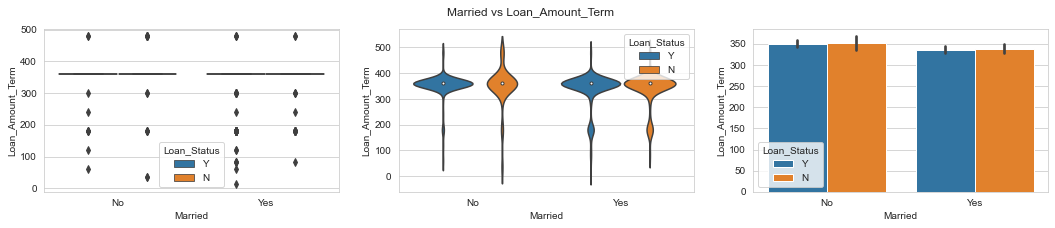

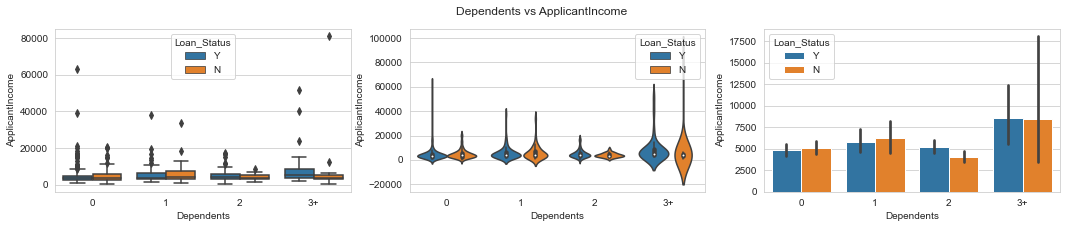

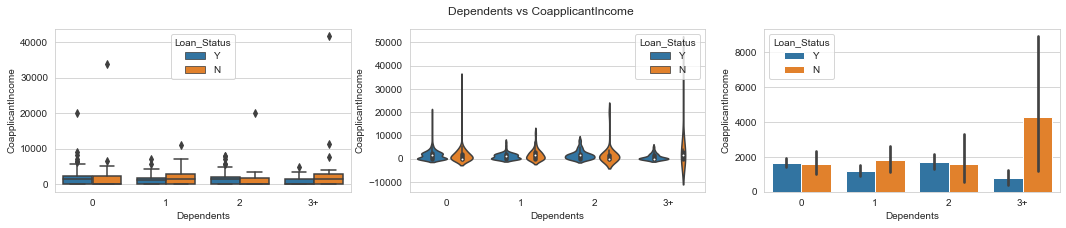

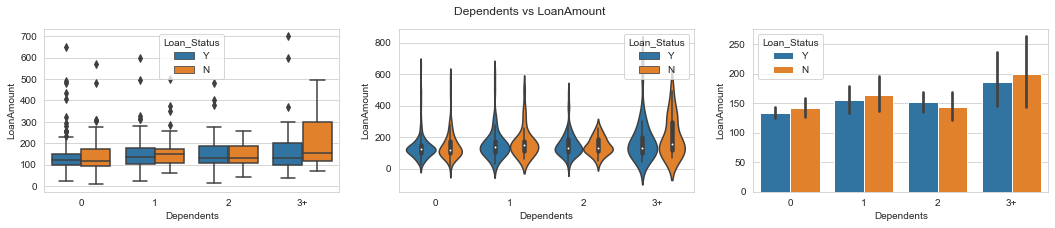

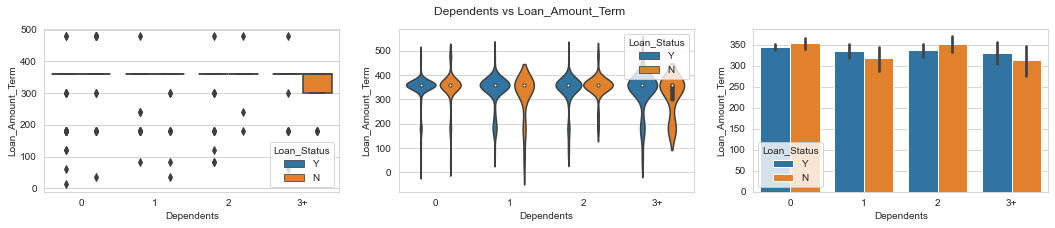

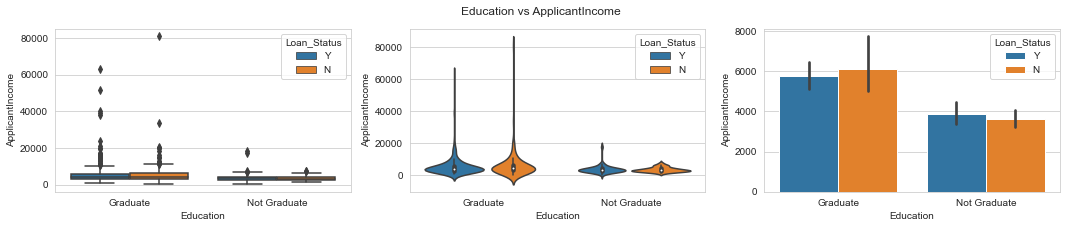

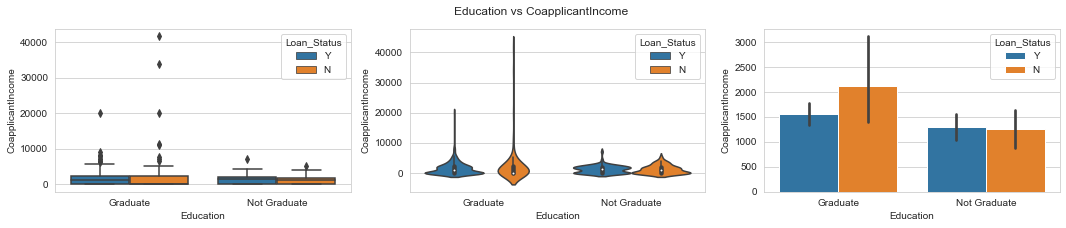

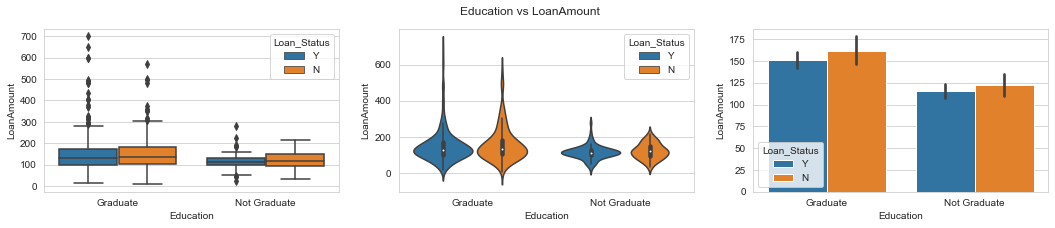

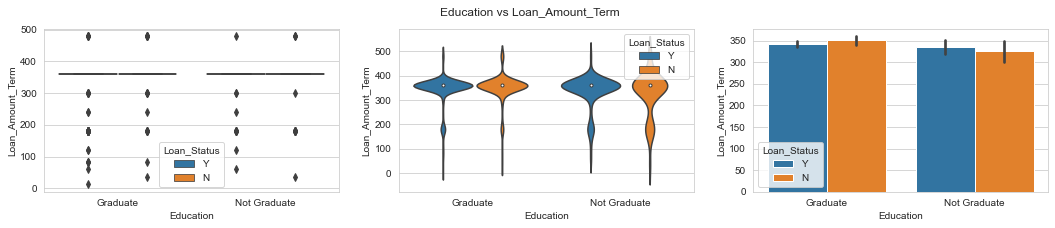

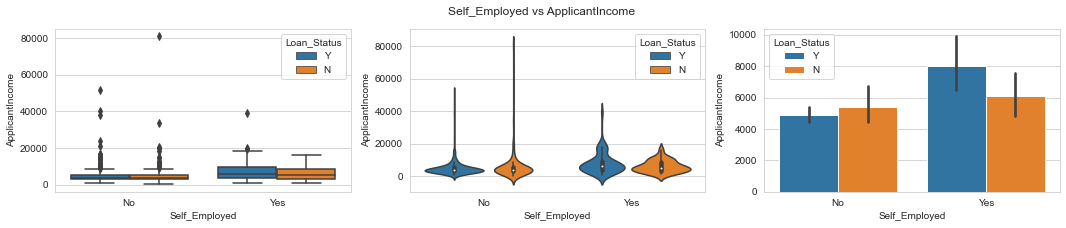

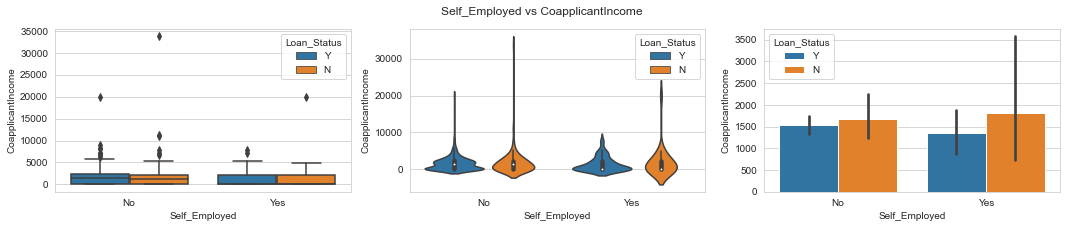

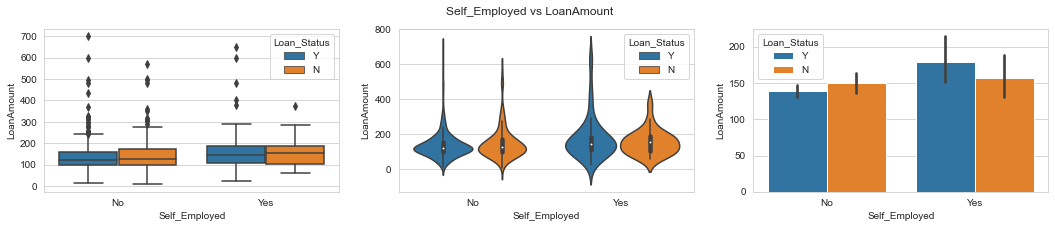

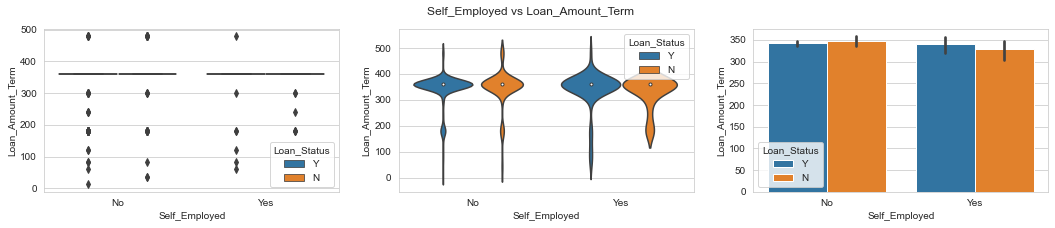

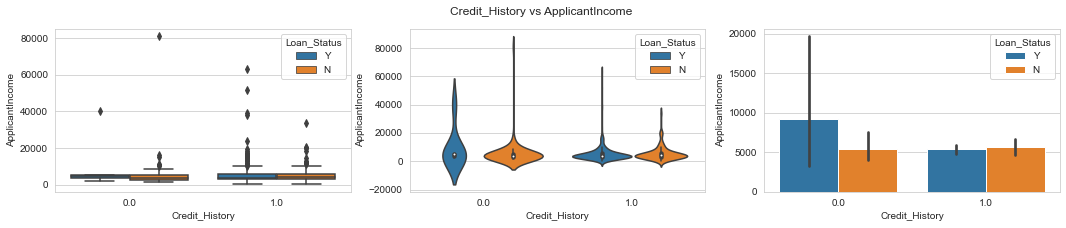

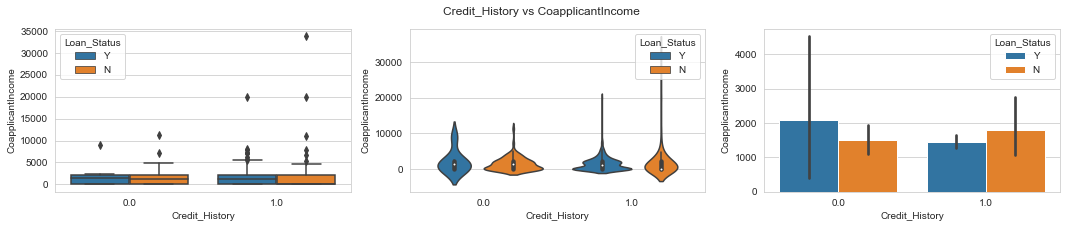

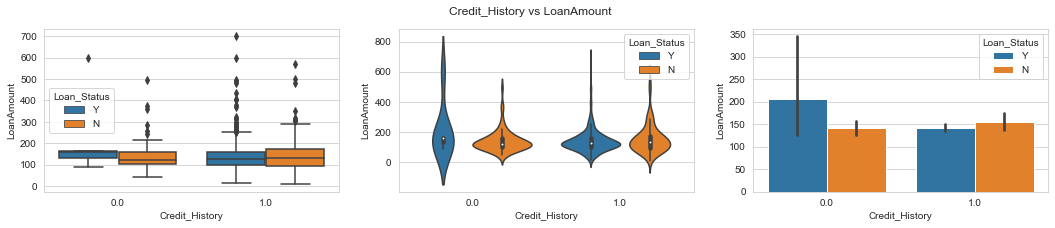

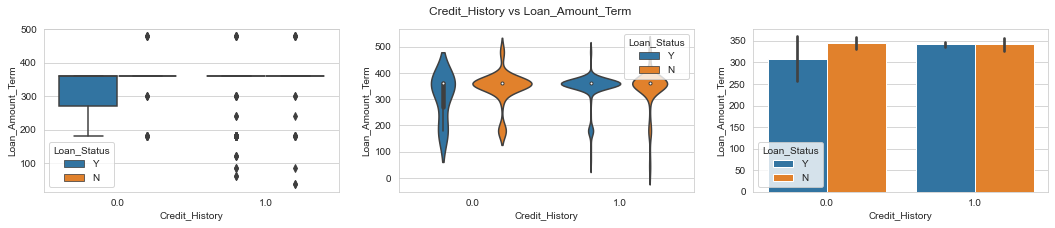

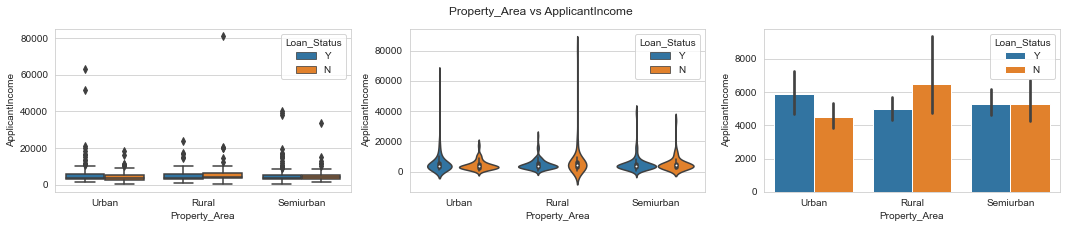

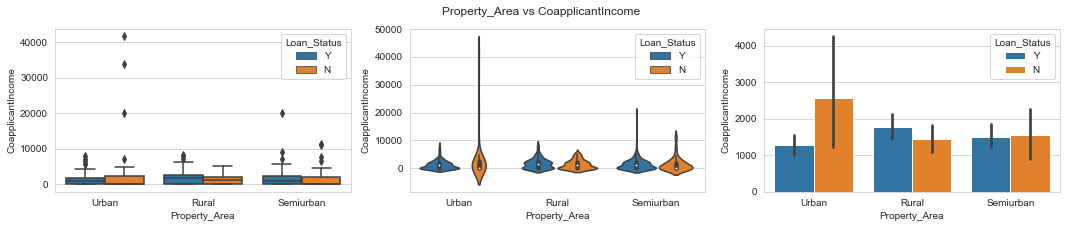

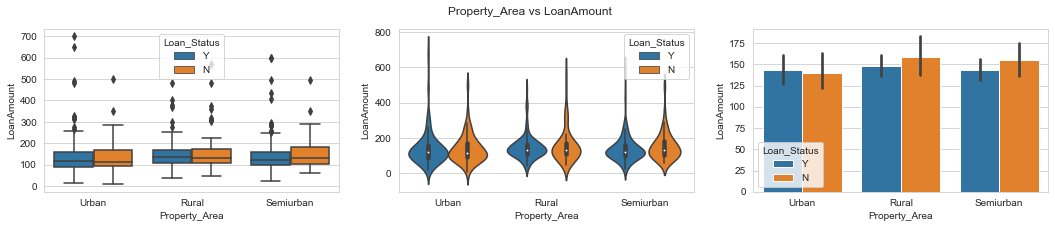

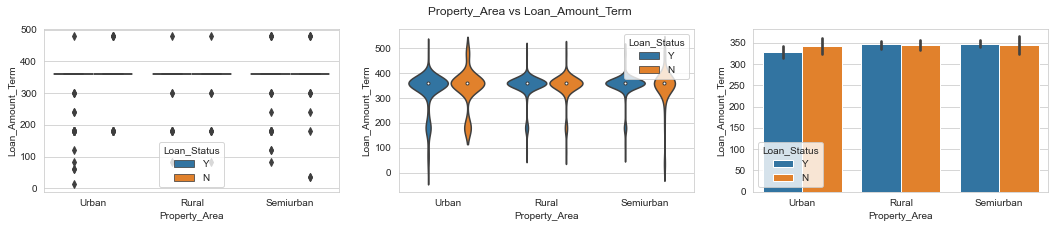

In [21]:
for col in cat_cols:
    if col == target_cols:
        continue   
    for ncol in num_cols:
        plt.figure(figsize=(18, 3))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(data=df, x=col, y=ncol, hue=target_cols)
        plt.subplot(1,3,2)
        sns.violinplot(data=df, x=col, y=ncol, hue=target_cols)
        plt.subplot(1,3,3)
        sns.barplot(data=df, x=col, y=ncol, hue=target_cols)
        plt.show()

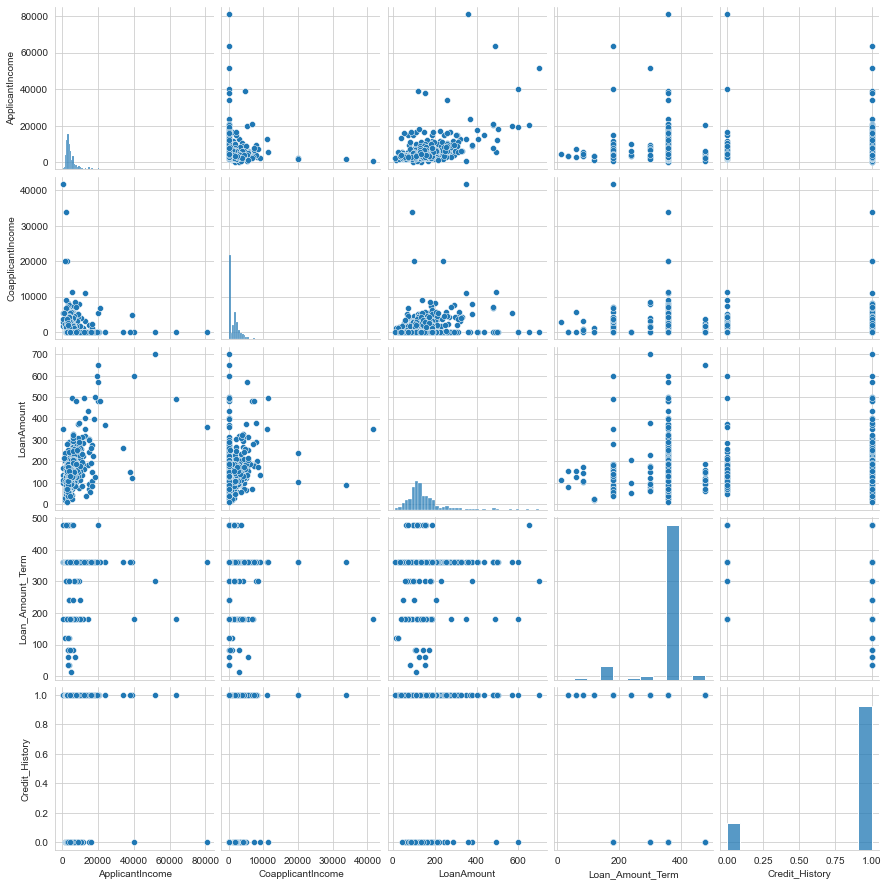

In [22]:
sns.pairplot(data = df)

In [23]:
from random import random, choice
p_list =['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

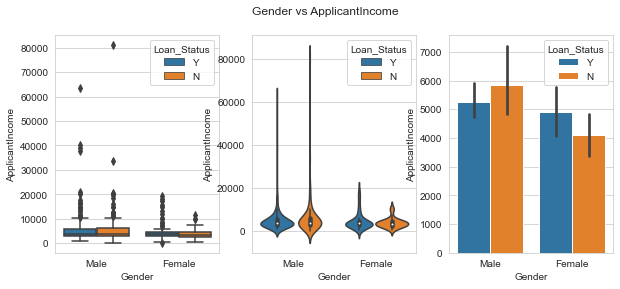

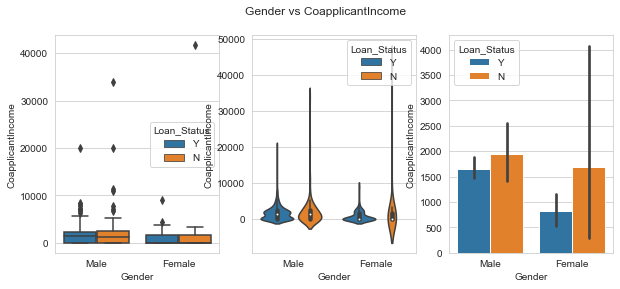

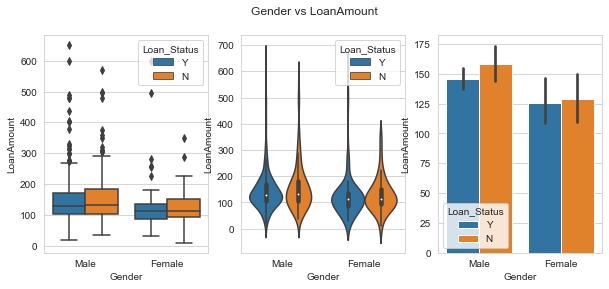

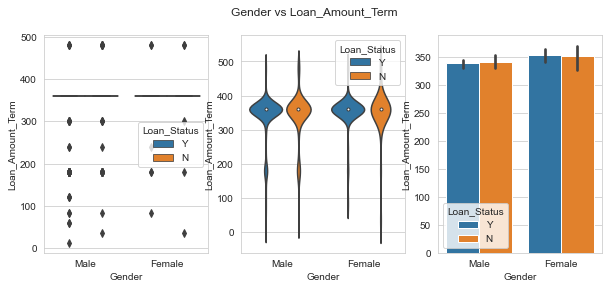

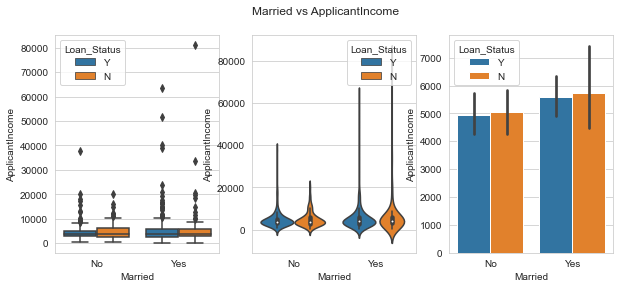

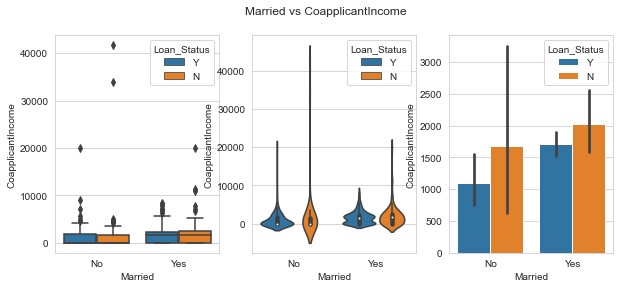

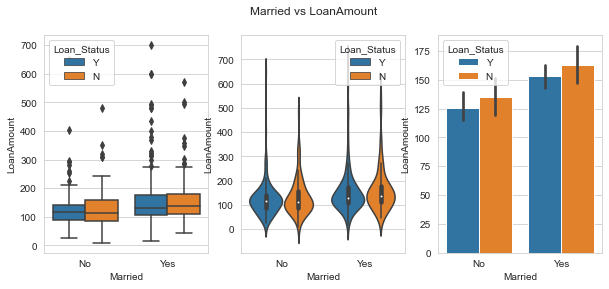

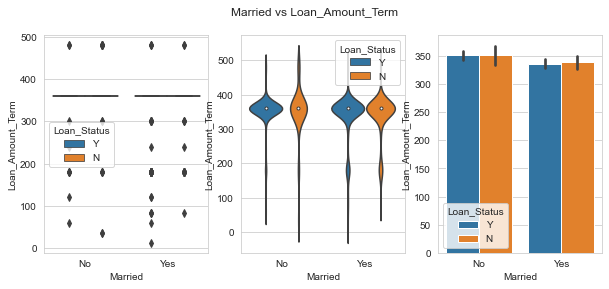

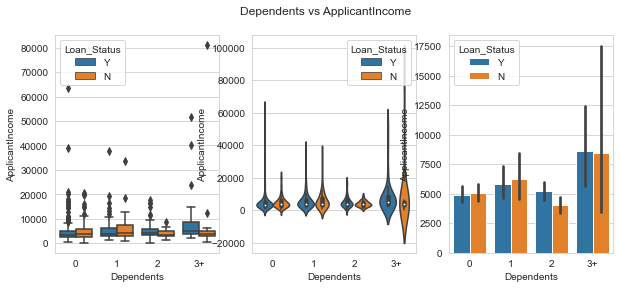

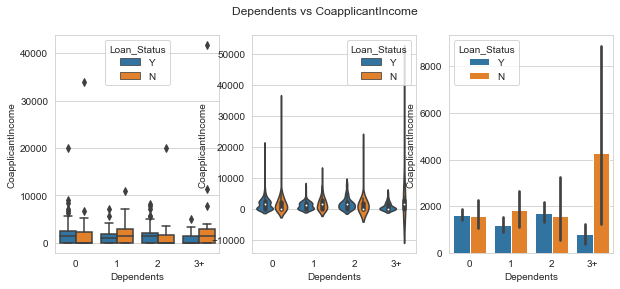

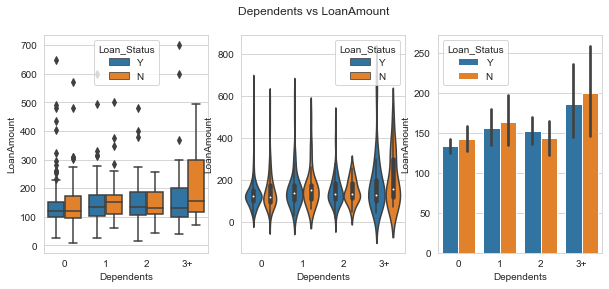

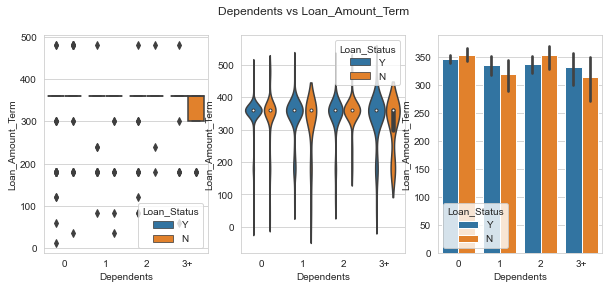

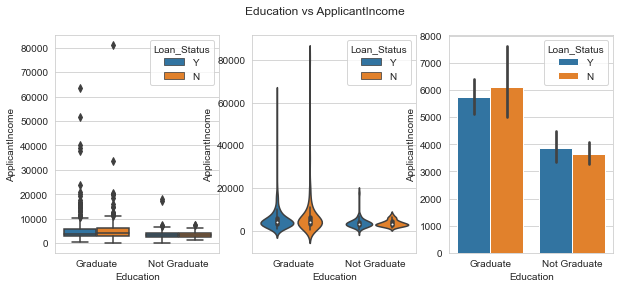

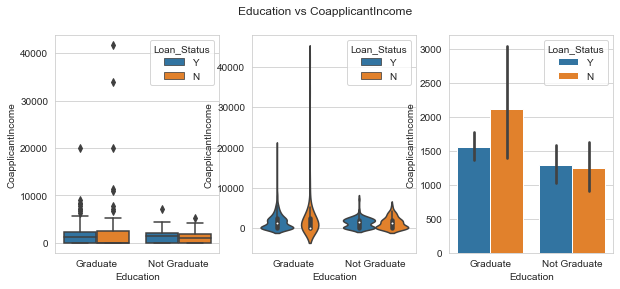

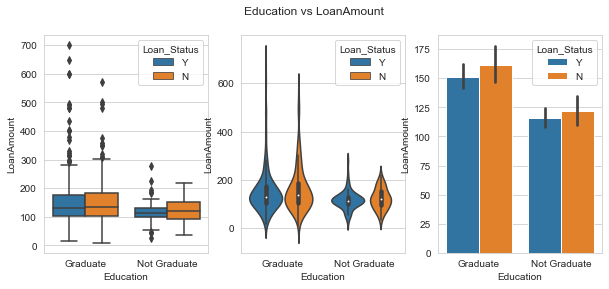

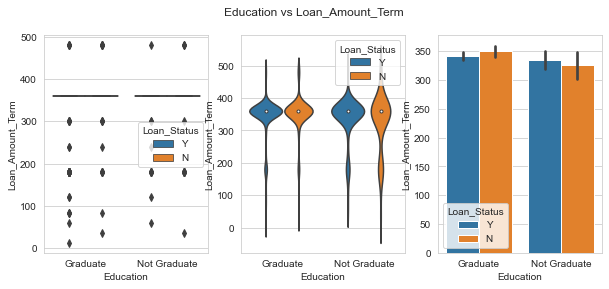

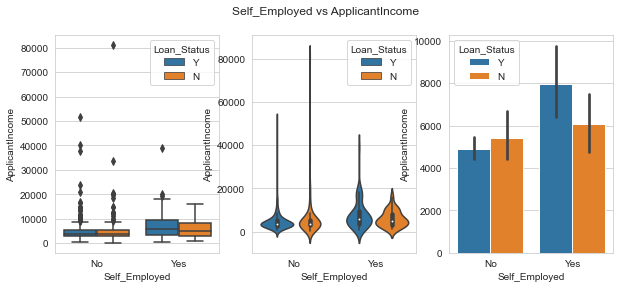

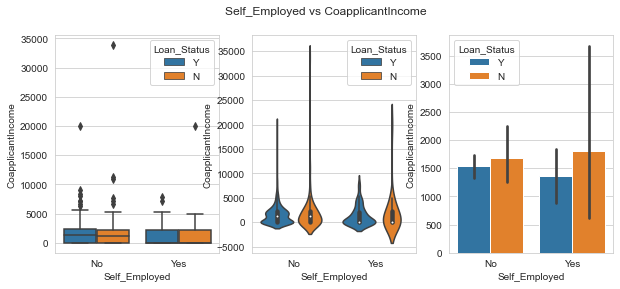

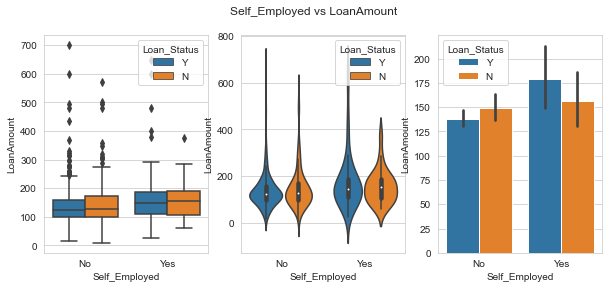

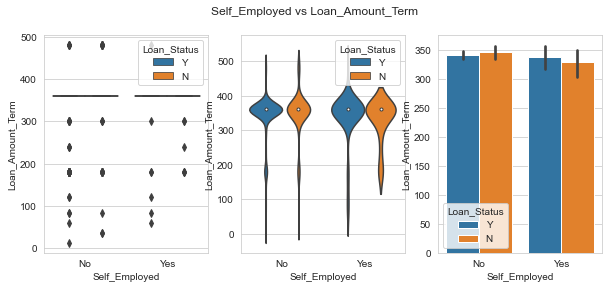

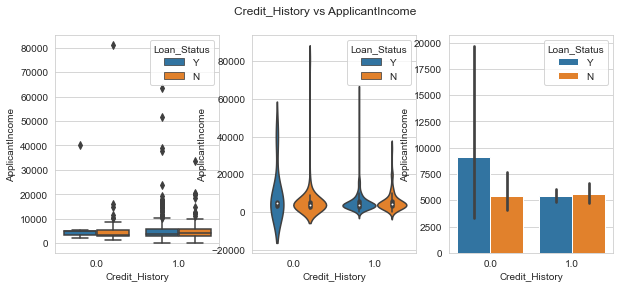

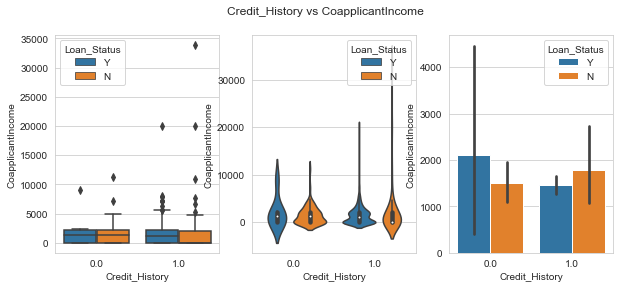

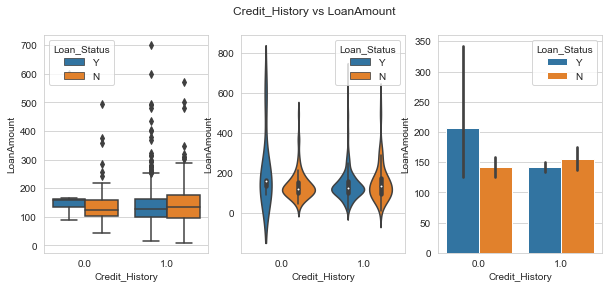

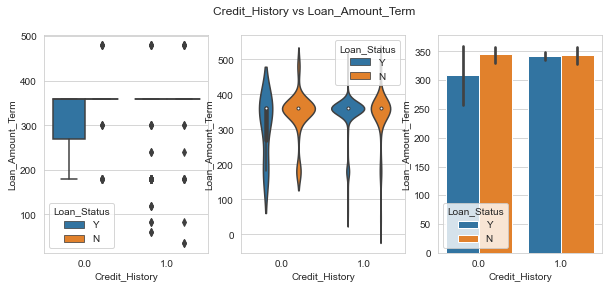

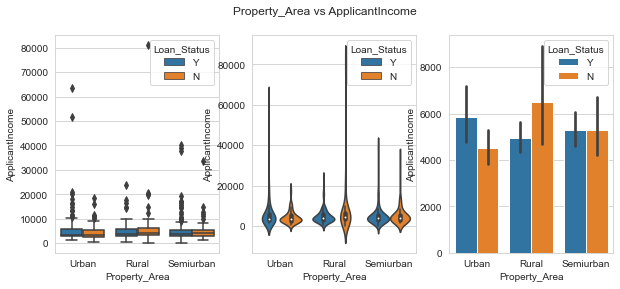

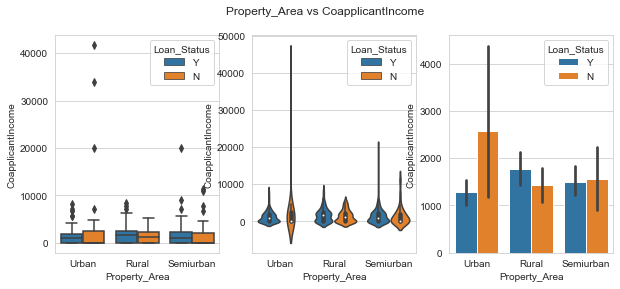

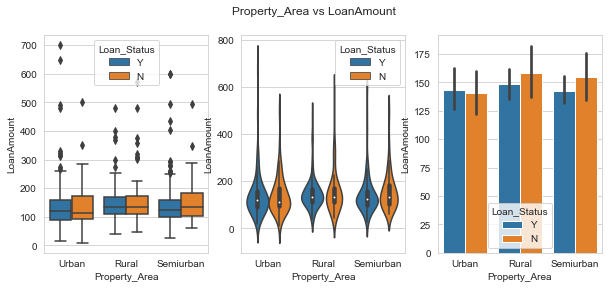

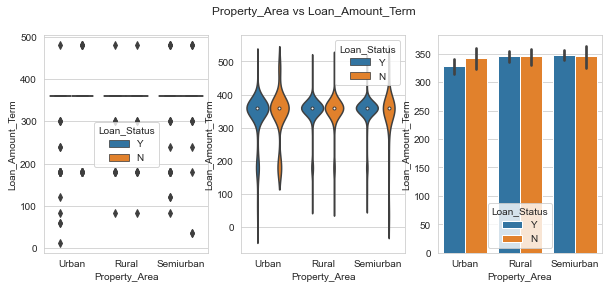

In [24]:
for col in cat_cols:
    if col == target_cols:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(10,4))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(data=df, x = col, y = ncol, hue=target_cols)
        plt.subplot(1,3,2)
        sns.violinplot(data=df, x=col, y=ncol, hue=target_cols)
        plt.subplot(1,3,3)
        sns.barplot(data=df, x=col, y=ncol, hue=target_cols)
        plt.show()

# **Missing Data Diagonsis**

In [25]:
pd.isnull(df).sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
100 * pd.isnull(df).sum()/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [27]:
df = df.dropna(subset=['Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term'])

In [28]:
100 * pd.isnull(df).sum()/len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [29]:
df.shape

(553, 13)

<AxesSubplot:>

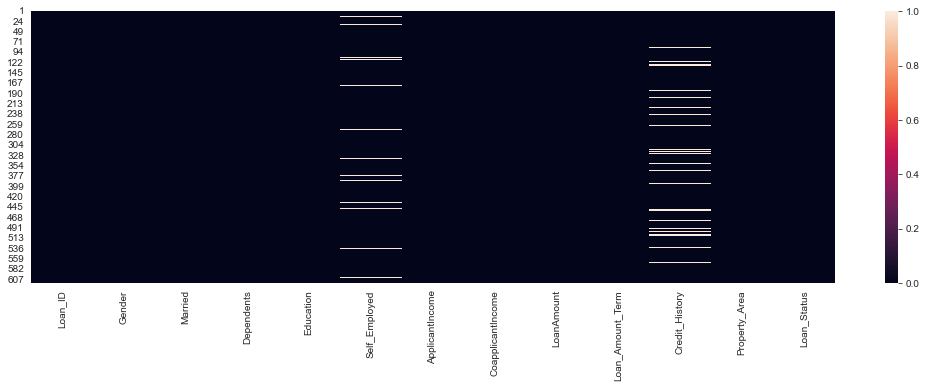

In [30]:
fig = plt.figure(figsize=(18, 5))
sns.heatmap(pd.isnull(df))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            553 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      523 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [32]:
# Imputing Self_Employed and Credit_History

In [33]:
sns.set_style('whitegrid')

In [34]:
df.drop(drop_cols, axis=1, inplace=True)

In [35]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# **String Data Preprocessing / Creating Dummies for string**

In [36]:
# List of variables to map

varlist =  ['Married', 'Self_Employed']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [37]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,1,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,1,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y


In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,1,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,1,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,1,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,1,2,Graduate,1.0,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [39]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
184,Female,1,0,Graduate,0.0,3625,0.0,108.0,360.0,1.0,Semiurban,Y
565,Male,1,0,Not Graduate,0.0,4467,0.0,120.0,360.0,NaN,Rural,Y
539,Male,1,3+,Graduate,0.0,6417,0.0,157.0,180.0,1.0,Rural,Y
417,Male,1,2,Graduate,1.0,1600,20000.0,239.0,360.0,1.0,Urban,N
39,Male,0,0,Not Graduate,0.0,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
532,Male,0,2,Graduate,0.0,3588,0.0,110.0,360.0,0.0,Rural,N
409,Male,1,3+,Graduate,0.0,81000,0.0,360.0,360.0,0.0,Rural,N
9,Male,1,1,Graduate,0.0,12841,10968.0,349.0,360.0,1.0,Semiurban,N
206,Female,0,0,Graduate,0.0,3244,0.0,80.0,360.0,1.0,Urban,Y
393,Male,1,2,Not Graduate,0.0,1993,1625.0,113.0,180.0,1.0,Semiurban,Y


In [40]:
# List of variables to map

varlist =  ['Gender']

# Defining the map function
def binary_map(x):
    return x.map({'Male': 1, 'Female': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,1,1,2,Graduate,1.0,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [42]:
# List of variables to map

varlist =  ['Education']

# Defining the map function
def binary_map(x):
    return x.map({'Graduate': 1, 'Not Graduate': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,1,1,2,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [44]:
df['Property_Area'].value_counts()

Semiurban    215
Urban        175
Rural        163
Name: Property_Area, dtype: int64

In [45]:
status = pd.get_dummies(df['Property_Area'])

In [46]:
status.head()

,Rural,Semiurban,Urban
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1


In [47]:
df = pd.concat([df, status], axis = 1)

In [48]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0
2,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,0,0,1
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,0,1
4,1,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,0,0,1
5,1,1,2,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,Y,0,0,1


In [49]:
df.drop('Property_Area', axis=1, inplace=True)

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,1,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Y,0,0,1
5,1,1,2,1,1.0,5417,4196.0,267.0,360.0,1.0,Y,0,0,1


In [51]:
# List of variables to map

varlist =  ['Loan_Status']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, 'N': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1,1,2,1,1.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1


In [53]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

# **Coming Back to missing data diagonsis**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int64  
 4   Self_Employed      523 non-null    float64
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Loan_Status        553 non-null    int64  
 11  Rural              553 non-null    uint8  
 12  Semiurban          553 non-null    uint8  
 13  Urban              553 non-null    uint8  
dtypes: float64(5), int64(5), object(1), uint8(3)
memory usage: 53.5+ KB


<AxesSubplot:xlabel='Loan_Status', ylabel='Self_Employed'>

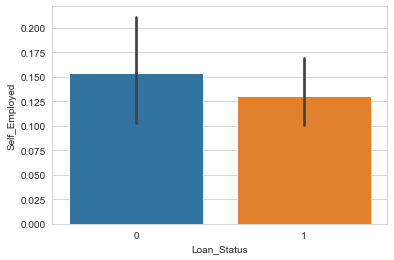

In [55]:
sns.barplot(data=df, x='Loan_Status', y='Self_Employed')

In [56]:
df['Self_Employed'].mean()

0.13766730401529637

In [57]:
df['Self_Employed'].fillna(0)

1      0.0
2      1.0
3      0.0
4      0.0
5      1.0
      ... 
609    0.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Self_Employed, Length: 553, dtype: float64

In [58]:
# Filling missing data using fillna
df['Self_Employed'].fillna(df['Self_Employed'].mean()).mean()

0.13766730401529634

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int64  
 4   Self_Employed      523 non-null    float64
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Loan_Status        553 non-null    int64  
 11  Rural              553 non-null    uint8  
 12  Semiurban          553 non-null    uint8  
 13  Urban              553 non-null    uint8  
dtypes: float64(5), int64(5), object(1), uint8(3)
memory usage: 53.5+ KB


<AxesSubplot:xlabel='Education', ylabel='Self_Employed'>

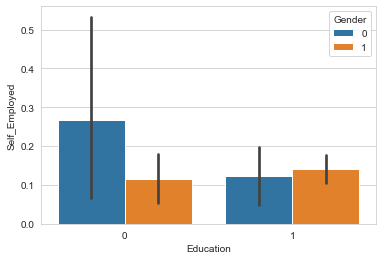

In [60]:
sns.barplot(data=df, x='Education', y='Self_Employed', hue='Gender')

In [61]:
# Impute the fake entries in missing Age Information
def Self_Employed_imputer(data):
    Self_Employed = data['Self_Employed']
    Education = data['Education']
    Gender = data['Gender']

    if pd.isnull(Self_Employed):
        return df['Self_Employed'][(df['Education']==Education)&(df['Gender']==Gender)].mean()
    else:
        return Self_Employed

df['Self_Employed'] = df.apply(Self_Employed_imputer, axis = 1)

In [62]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1,1,2,1,1.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1


<AxesSubplot:>

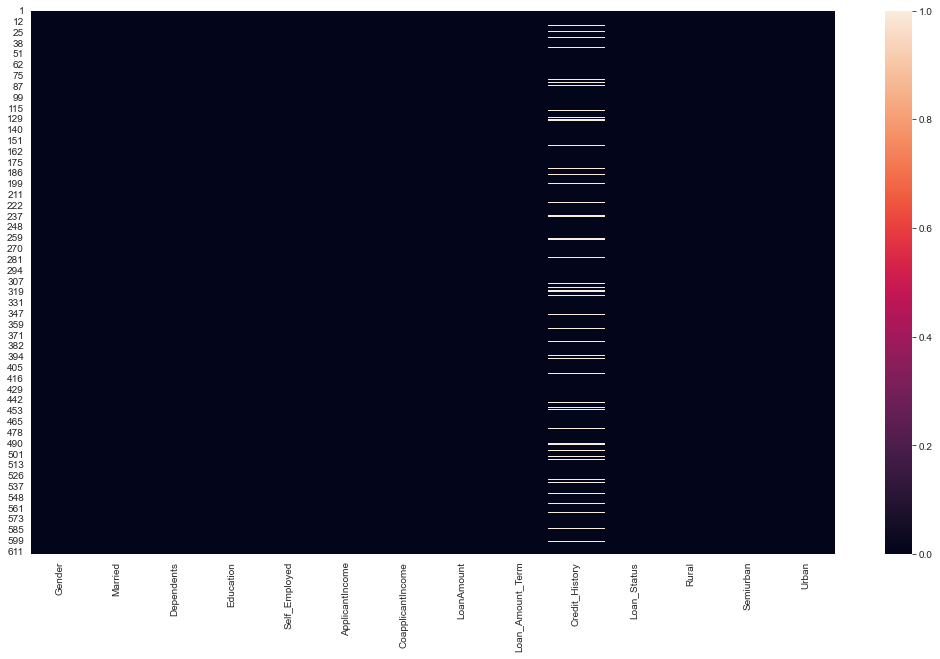

In [63]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int64  
 4   Self_Employed      553 non-null    float64
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Loan_Status        553 non-null    int64  
 11  Rural              553 non-null    uint8  
 12  Semiurban          553 non-null    uint8  
 13  Urban              553 non-null    uint8  
dtypes: float64(5), int64(5), object(1), uint8(3)
memory usage: 53.5+ KB


<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

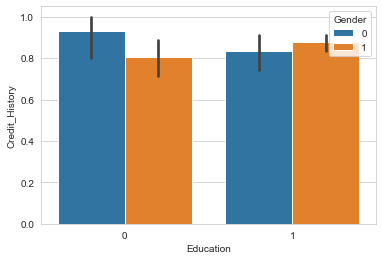

In [65]:
sns.barplot(data=df, x='Education', y='Credit_History', hue='Gender')

In [66]:
# Impute the fake entries in missing Age Information
def Credit_History_imputer(data):
    Credit_History = data['Credit_History']
    Education = data['Education']
    Gender = data['Gender']

    if pd.isnull(Credit_History):
        return df['Credit_History'][(df['Education']==Education)&(df['Gender']==Gender)].mean()
    else:
        return Credit_History

df['Credit_History'] = df.apply(Credit_History_imputer, axis = 1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int64  
 4   Self_Employed      553 non-null    float64
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Loan_Status        553 non-null    int64  
 11  Rural              553 non-null    uint8  
 12  Semiurban          553 non-null    uint8  
 13  Urban              553 non-null    uint8  
dtypes: float64(5), int64(5), object(1), uint8(3)
memory usage: 53.5+ KB


<AxesSubplot:>

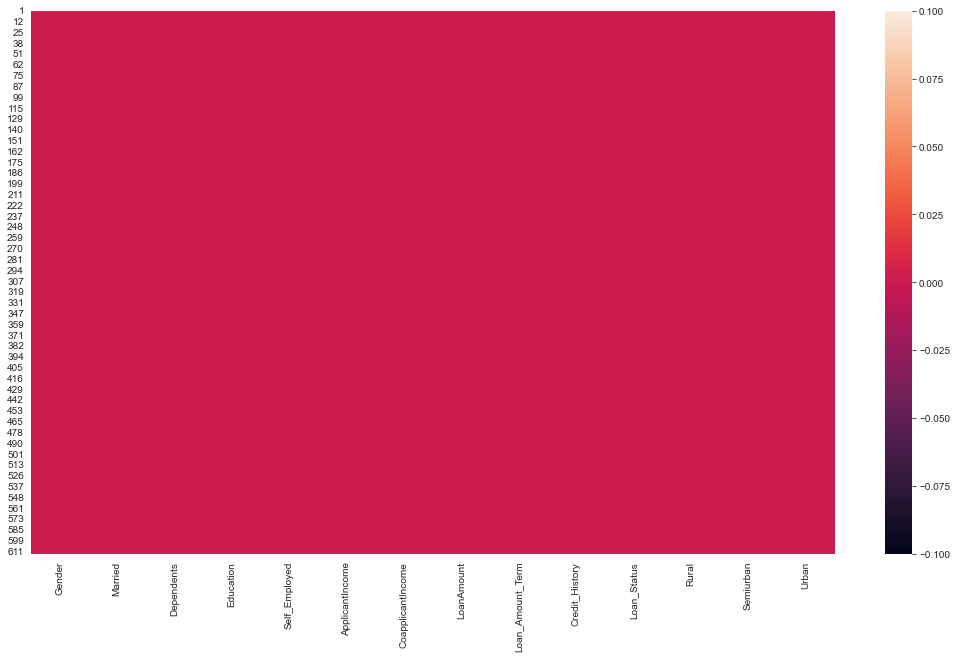

In [68]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [69]:
100*pd.isnull(df).sum()/len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Loan_Status          0.0
Rural                0.0
Semiurban            0.0
Urban                0.0
dtype: float64

In [70]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1,1,2,1,1.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1


In [71]:
df['Dependents'].value_counts()

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [72]:
# List of variables to map

varlist =  ['Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'0': 0, '1': 1, '2': 2, '3+': 3})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    int64  
 3   Education          553 non-null    int64  
 4   Self_Employed      553 non-null    float64
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Loan_Status        553 non-null    int64  
 11  Rural              553 non-null    uint8  
 12  Semiurban          553 non-null    uint8  
 13  Urban              553 non-null    uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 53.5 KB


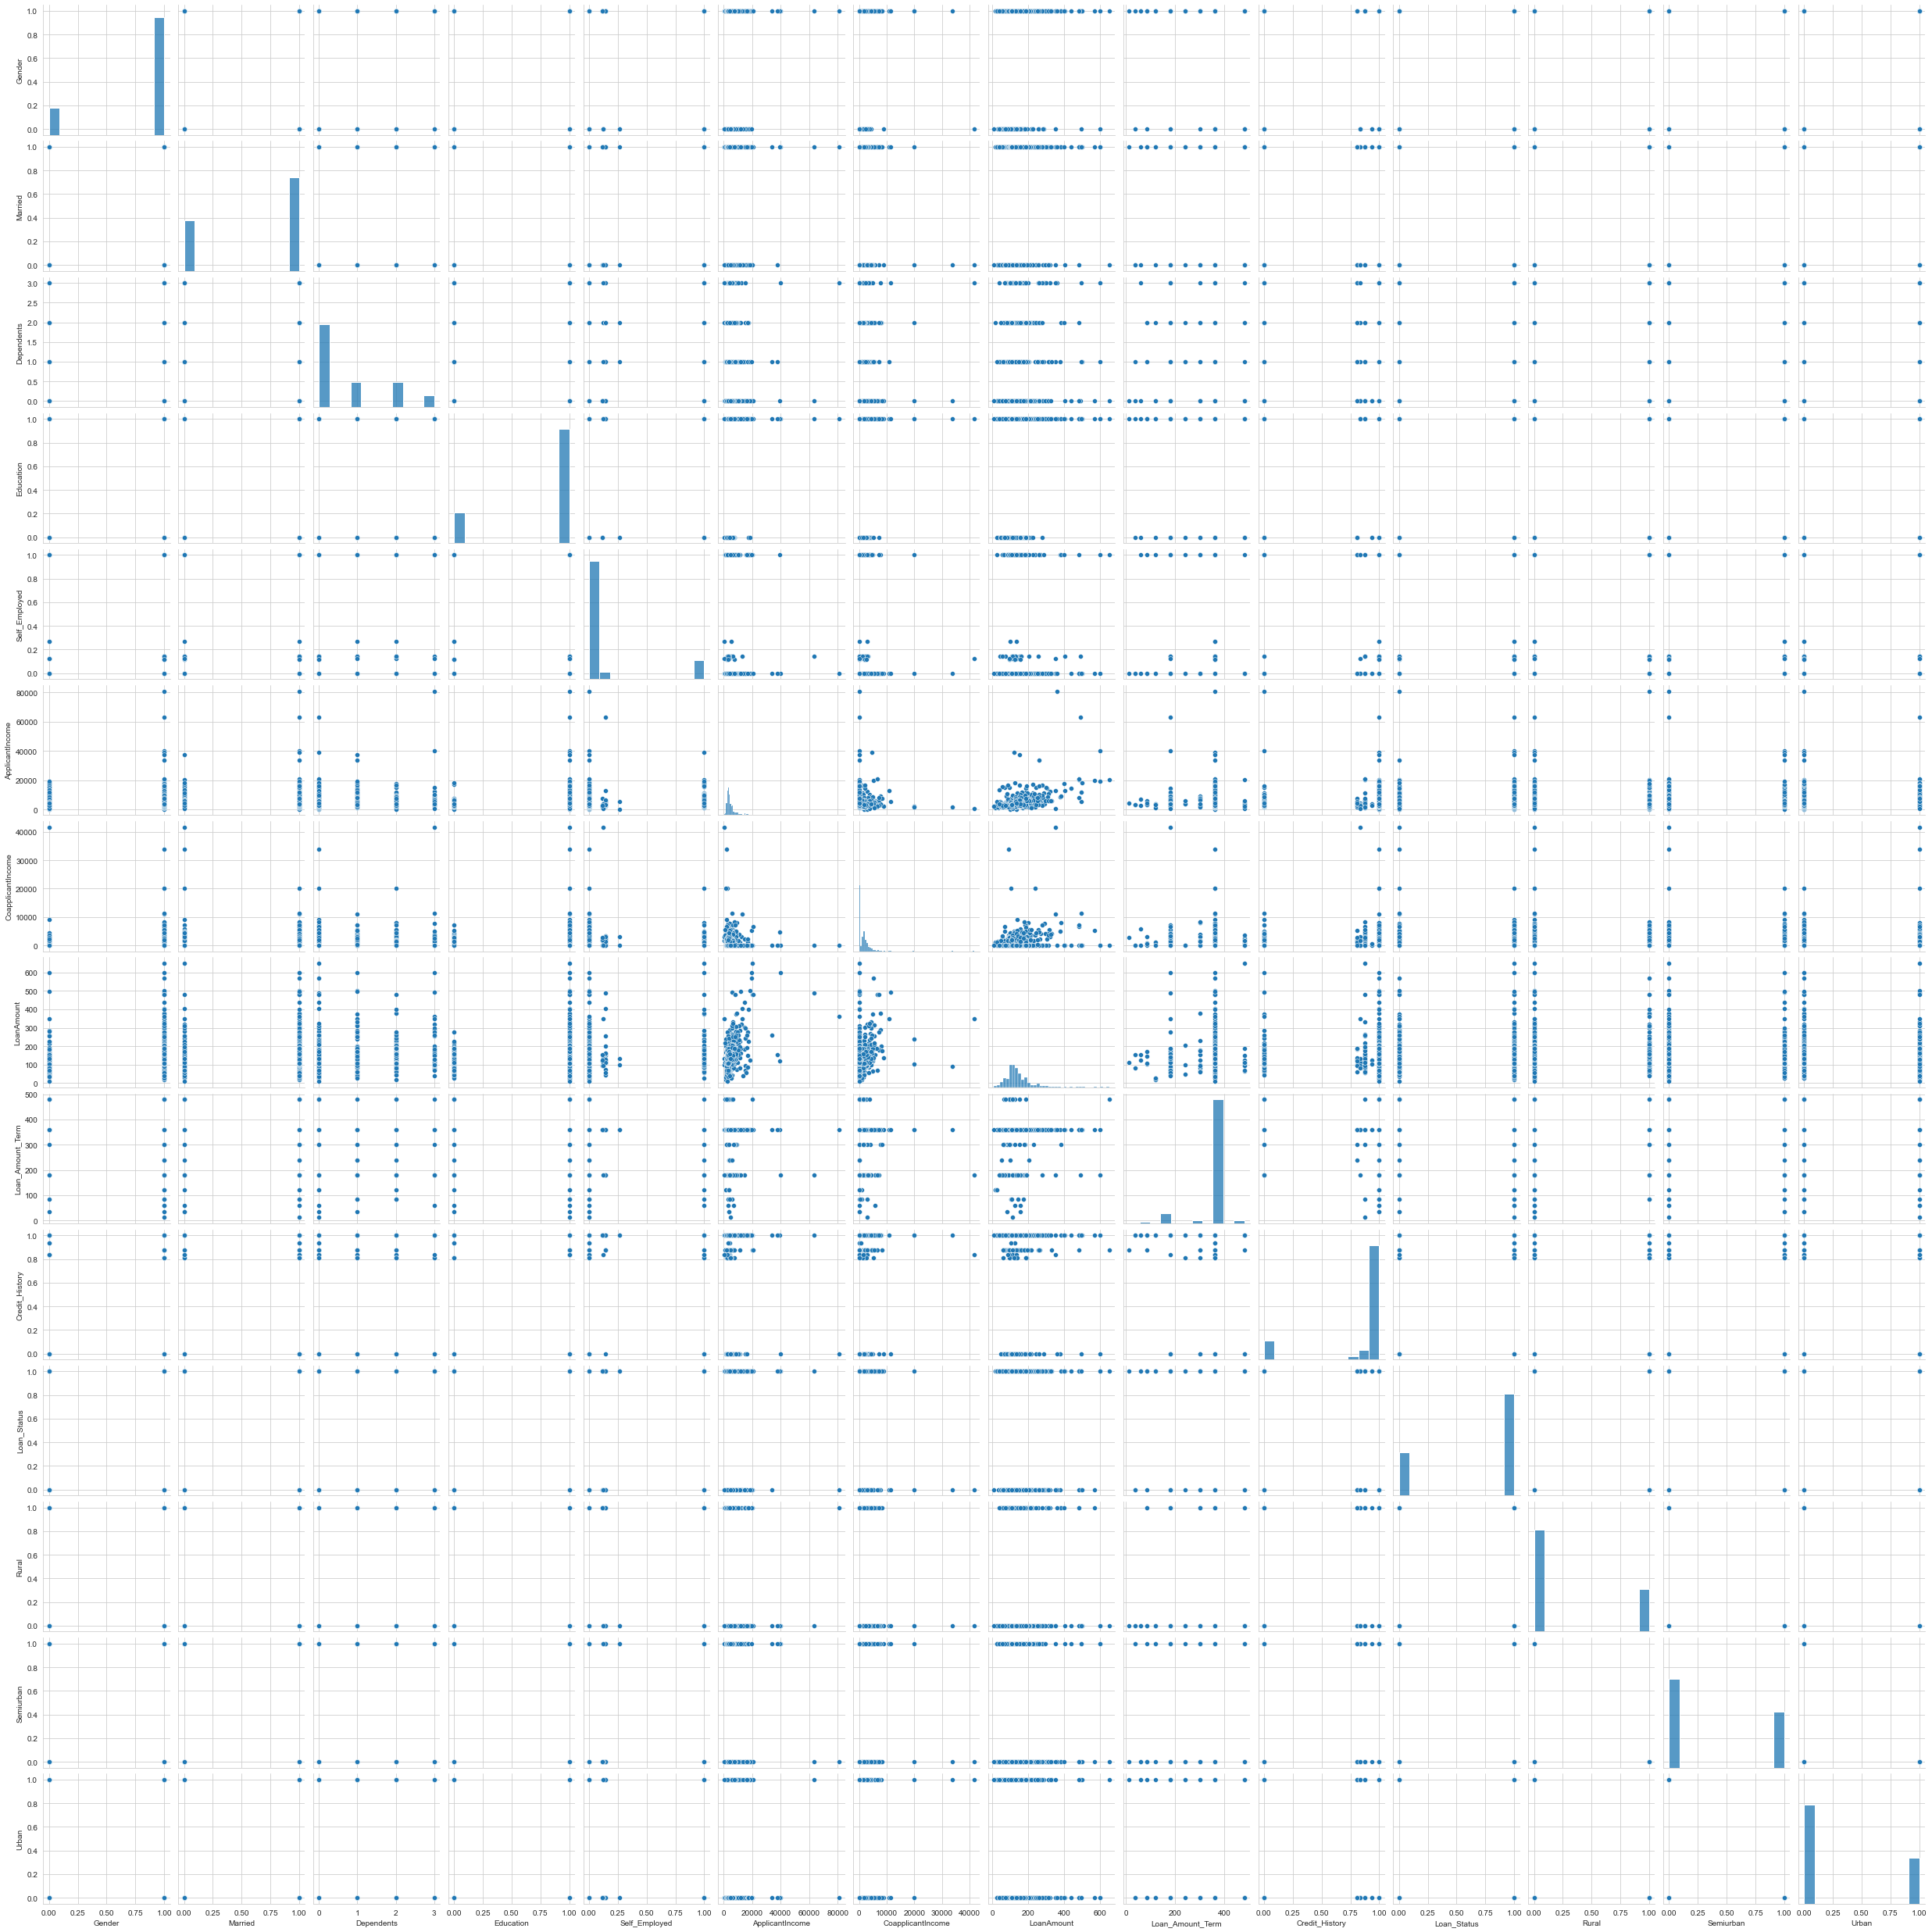

In [74]:
sns.pairplot(df)

In [75]:
target = df[target_cols]
features = df.drop(target_cols, axis = 1)

In [76]:
target.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [77]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
1,1,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,0,1
5,1,1,2,1,1.0,5417,4196.0,267.0,360.0,1.0,0,0,1


# Mahine Learning Template

# **Data Splitting**

In [78]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

# **Model Creation & Training**


In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

# **Model Evaluation**

In [80]:
print(round(100*model.score(xtest, ytest)), '%')

81 %


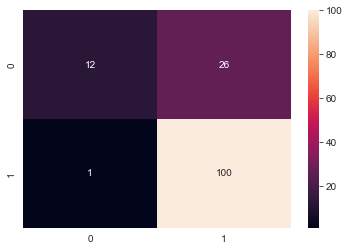

              precision    recall  f1-score   support

           0       0.92      0.32      0.47        38
           1       0.79      0.99      0.88       101

    accuracy                           0.81       139
   macro avg       0.86      0.65      0.68       139
weighted avg       0.83      0.81      0.77       139



In [81]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred), annot = True, fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))

In [82]:
pd.Series(ytest_pred).value_counts()

1    126
0     13
dtype: int64

In [83]:
# Putting Class Weights/Hyperparam
model1 = LogisticRegression(class_weight = {0 : 0.9, 1 : 0.6}, random_state=101)
model1.fit(xtrain,ytrain)

print(classification_report(ytest,model1.predict(xtest)))


# This method did not work

              precision    recall  f1-score   support

           0       0.79      0.39      0.53        38
           1       0.81      0.96      0.88       101

    accuracy                           0.81       139
   macro avg       0.80      0.68      0.70       139
weighted avg       0.80      0.81      0.78       139



In [84]:
# Hyperparam
for algo in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    print(algo)
    model_algo = LogisticRegression(random_state=101, solver = algo, tol = 1, C=1)
    model_algo.fit(xtrain,ytrain)
    print(classification_report(ytest,model_algo.predict(xtest)))


newton-cg
              precision    recall  f1-score   support

           0       0.92      0.32      0.47        38
           1       0.79      0.99      0.88       101

    accuracy                           0.81       139
   macro avg       0.86      0.65      0.68       139
weighted avg       0.83      0.81      0.77       139

lbfgs
              precision    recall  f1-score   support

           0       0.92      0.32      0.47        38
           1       0.79      0.99      0.88       101

    accuracy                           0.81       139
   macro avg       0.86      0.65      0.68       139
weighted avg       0.83      0.81      0.77       139

liblinear
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.73      1.00      0.84       101

    accuracy                           0.73       139
   macro avg       0.36      0.50      0.42       139
weighted avg       0.53      0.73      0.61     

In [85]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
print(classification_report(ytest, model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.43      0.39      0.41        38
           1       0.78      0.80      0.79       101

    accuracy                           0.69       139
   macro avg       0.60      0.60      0.60       139
weighted avg       0.68      0.69      0.69       139



In [86]:
pd.DataFrame(model_dt.feature_importances_, index = xtrain.columns, columns=['Importance']).\
    sort_values(by='Importance', ascending=False)

,Importance
Credit_History,0.291739
ApplicantIncome,0.207271
LoanAmount,0.200976
CoapplicantIncome,0.109117
Dependents,0.051435
Loan_Amount_Term,0.048391
Self_Employed,0.026923
Rural,0.016406
Urban,0.015212
Gender,0.010194


In [87]:
imp_cols = ['Credit_History', 'ApplicantIncome', 'LoanAmount']

In [88]:
model_dt2 = DecisionTreeClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest, model_dt2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54        38
           1       0.83      0.79      0.81       101

    accuracy                           0.73       139
   macro avg       0.67      0.69      0.68       139
weighted avg       0.75      0.73      0.74       139



In [89]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(xtrain, ytrain)
print(classification_report(ytest, model_rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.74      0.37      0.49        38
           1       0.80      0.95      0.87       101

    accuracy                           0.79       139
   macro avg       0.77      0.66      0.68       139
weighted avg       0.78      0.79      0.77       139



In [90]:
pd.DataFrame(model_rf.feature_importances_, index = xtrain.columns, columns=['Importance']).\
    sort_values(by='Importance', ascending=False)

,Importance
Credit_History,0.244806
ApplicantIncome,0.207571
LoanAmount,0.182424
CoapplicantIncome,0.106739
Loan_Amount_Term,0.054561
Dependents,0.045528
Self_Employed,0.032170
Married,0.025596
Semiurban,0.023972
Education,0.023087


In [91]:
model_rf2 = RandomForestClassifier().fit(xtrain[imp_cols], ytrain)
print(classification_report(ytest, model_rf2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51        38
           1       0.81      0.88      0.84       101

    accuracy                           0.76       139
   macro avg       0.70      0.66      0.68       139
weighted avg       0.75      0.76      0.75       139



1. After applying various Algorithms, it is observed that the best score is around ~81% with Logistic Regression Only
2. Also Random Forest Model can be used if we want less number of parameters

In [93]:
pd.to_pickle(model, 'Loan_approval_predictions.pickle')